In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [12]:
data = pd.read_csv('../Data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')

In [13]:
data

Open         High          Low        Close    Adj Close  \
Date                                                                          
1996-01-01    14.638248    14.716795    14.541850    14.691803     9.302443   
1996-01-02    14.656100    14.727506    14.470444    14.577553     9.230105   
1996-01-03    14.816763    15.491551    14.656100    14.688232     9.300181   
1996-01-04    14.548991    14.595404    14.356194    14.552561     9.214279   
1996-01-05    14.495436    14.495436    14.327632    14.452592     9.150980   
...                 ...          ...          ...          ...          ...   
2024-06-28  3062.050049  3162.000000  3062.050049  3130.800049  3130.800049   
2024-07-01  3125.050049  3158.800049  3111.350098  3120.300049  3120.300049   
2024-07-02  3139.000000  3147.000000  3114.000000  3130.350098  3130.350098   
2024-07-03  3132.649902  3150.000000  3085.550049  3104.850098  3104.850098   
2024-07-04  3114.000000  3135.000000  3101.600098  3108.050049  3108.050049   

               Volume  
Date                   
1996-01-01   52060684  
1996-01-02   84371654  
1996-01-03  104661939  
1996-01-04  108450132  
1996-01-05   83354233  
...               ...  
2024-06-28   14478668  
2024-07-01    3862153  
2024-07-02    3874623  
2024-07-03    4524810  
2024-07-04    3416505  

[7159 rows x 6 columns]

<Axes: xlabel='Date'>

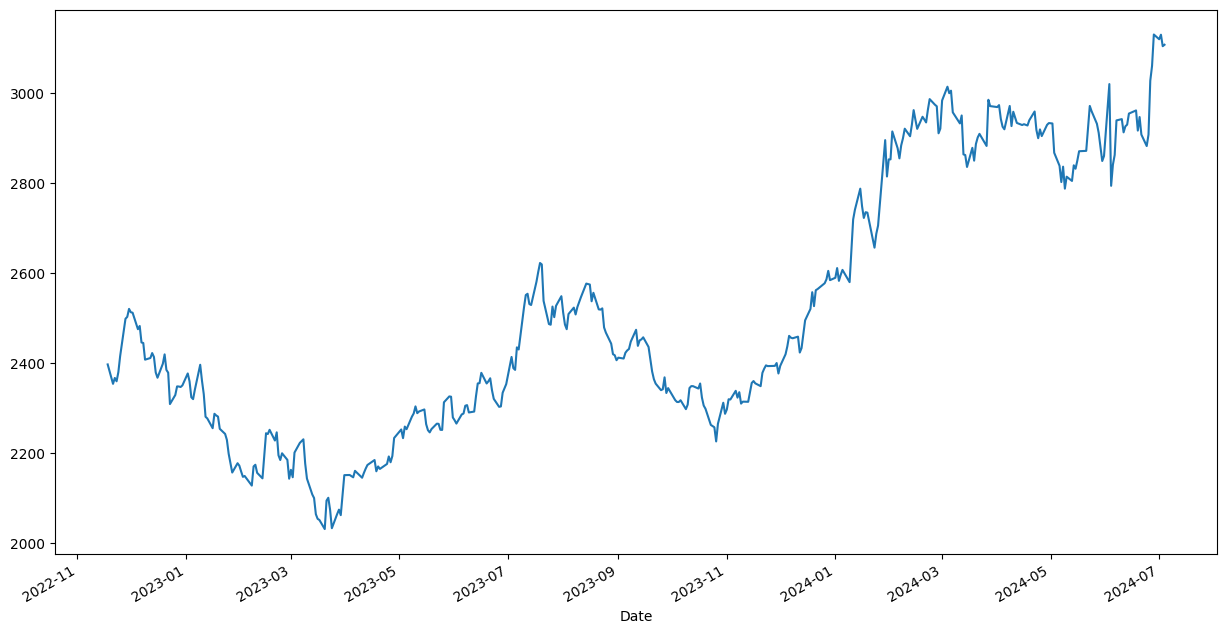

In [14]:
data[-400:].Close.plot(figsize =(15,8))

In [15]:
data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()

In [16]:
data['Signal'] = 0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)

In [17]:
data['Position'] = data.Signal.diff()

In [18]:
data['Position']

Date
1996-01-01    NaN
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2024-06-28    0.0
2024-07-01    0.0
2024-07-02    0.0
2024-07-03    0.0
2024-07-04    0.0
Name: Position, Length: 7159, dtype: float64

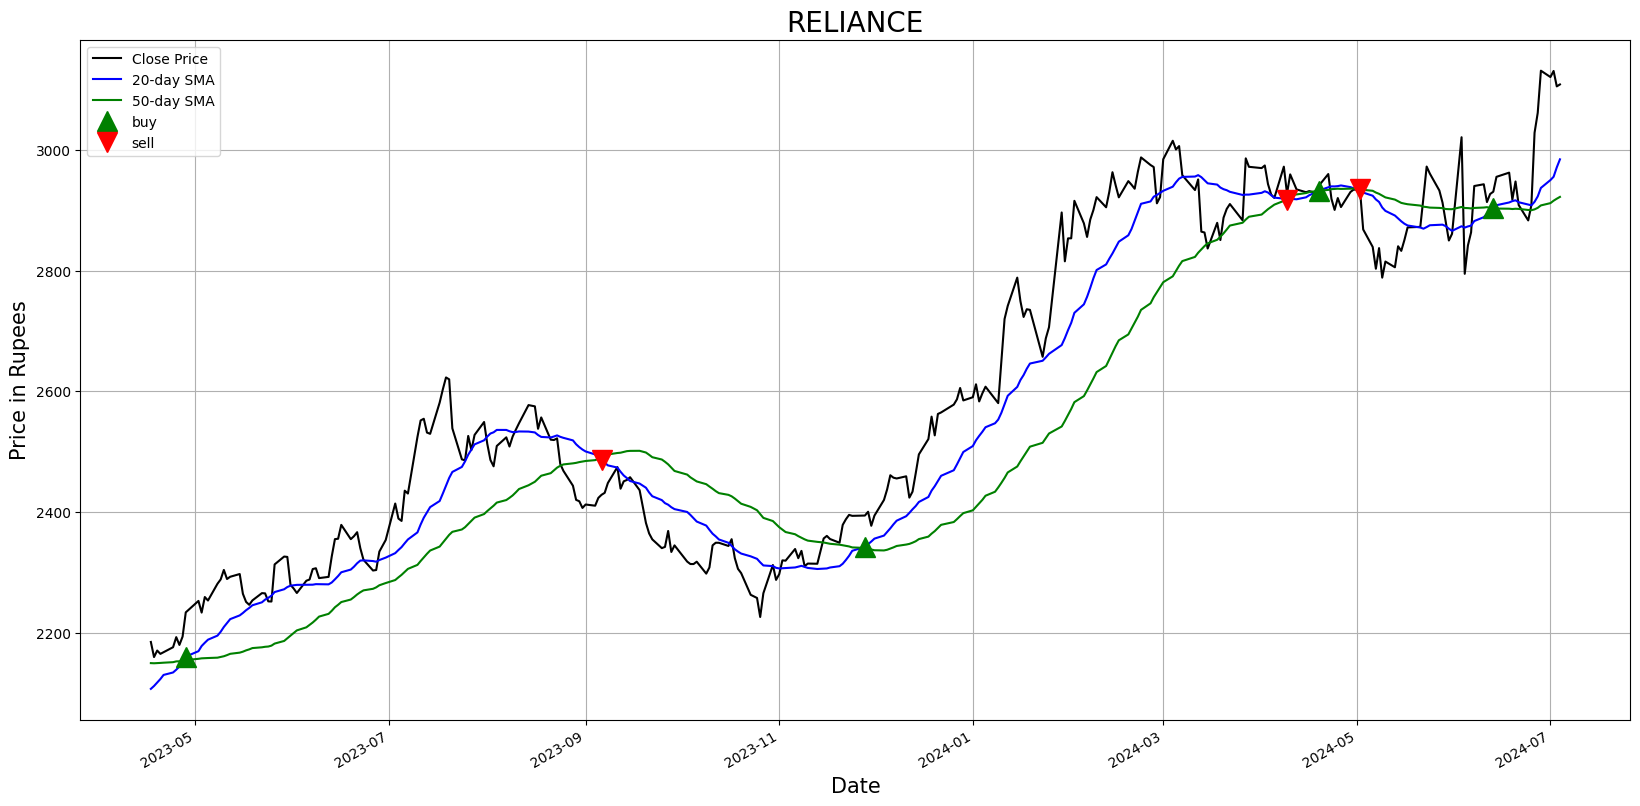

In [19]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
data.iloc[-300:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data.iloc[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index, 
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == -1].index, 
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [20]:
df_pos = data.iloc[-200:][(data.iloc[-200:]['Position'] == 1) | (data['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-11-28 00:00:00 | 2394.4  | Buy        |
| 2024-04-09 00:00:00 | 2927.3  | Sell       |
| 2024-04-19 00:00:00 | 2940.25 | Buy        |
| 2024-05-02 00:00:00 | 2933.1  | Sell       |
| 2024-06-13 00:00:00 | 2930.5  | Buy        |
+---------------------+---------+------------+


C:\Users\tusha\AppData\Local\Temp\ipykernel_24316\86423085.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-200:][(data.iloc[-200:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [21]:
def GoldenCrossverSignal(name, data_point):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

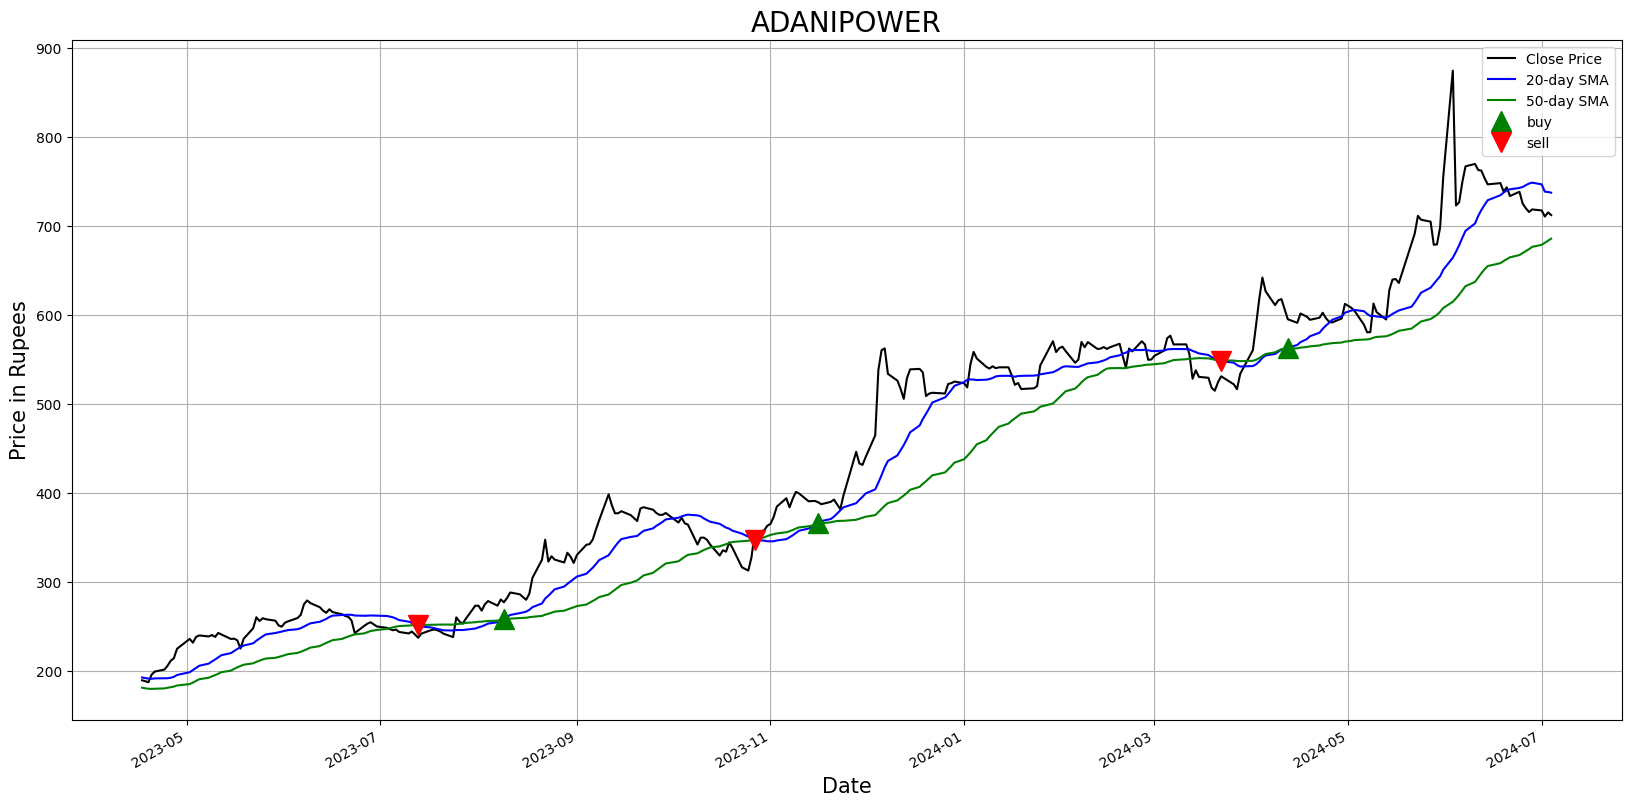

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-07-13 00:00:00 |  237.2  | Sell       |
| 2023-08-09 00:00:00 |  277.15 | Buy        |
| 2023-10-27 00:00:00 |  354.15 | Sell       |
| 2023-11-16 00:00:00 |  389.55 | Buy        |
| 2024-03-22 00:00:00 |  531.05 | Sell       |
| 2024-04-12 00:00:00 |  595.2  | Buy        |
+---------------------+---------+------------+


C:\Users\tusha\AppData\Local\Temp\ipykernel_24316\4007909075.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [22]:
GoldenCrossverSignal('ADANIPOWER', 300)